ReLU와 같은 Activation Function의 역할을 알아봅시다.

https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html

선형 분류가 어려운 가상의 데이터셋을 만들어봅시다

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(0)
torch.manual_seed(0)

N = 500  # 데이터 포인트 수
radius = 2  # 원의 반지름
noise = 0.1  # 노이즈 정도

# 원형 패턴 데이터 생성
inner_circle = radius * np.random.rand(N//2)[:, np.newaxis] #np.newaxis는 차원 추가
outer_circle = radius + radius * np.random.rand(N//2)[:, np.newaxis]
inner_labels = np.zeros((N//2, 1))
outer_labels = np.ones((N//2, 1))

# 좌표 변환 (극좌표계 -> 직교좌표계)
angles = 2 * np.pi * np.random.rand(N, 1)
inner_x = inner_circle * np.cos(angles[:N//2])
inner_y = inner_circle * np.sin(angles[:N//2])
outer_x = outer_circle * np.cos(angles[N//2:])
outer_y = outer_circle * np.sin(angles[N//2:])

x = np.vstack((np.hstack((inner_x, inner_y)), np.hstack((outer_x, outer_y))))
y = np.vstack((inner_labels, outer_labels))

In [18]:
x.shape, y.shape

((500, 2), (500, 1))

In [19]:
x[0], y[0]

(array([-0.40650426,  1.01957802]), array([0.]))

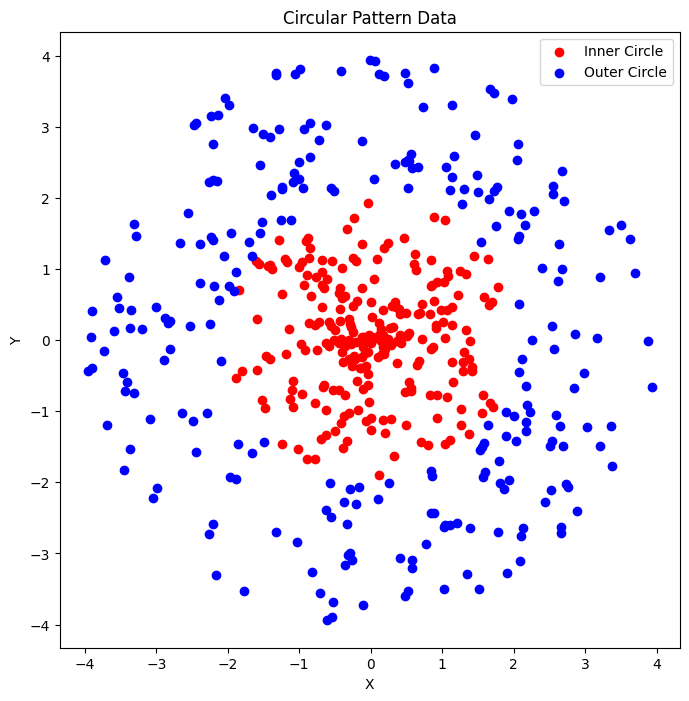

In [20]:
# 데이터 포인트 그래프로 표시
plt.figure(figsize=(8, 8))
plt.scatter(x[y[:, 0] == 0][:, 0], x[y[:, 0] == 0][:, 1], color='red', label='Inner Circle')
plt.scatter(x[y[:, 0] == 1][:, 0], x[y[:, 0] == 1][:, 1], color='blue', label='Outer Circle')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Circular Pattern Data')
plt.legend()
plt.show()

In [21]:


# 데이터를 텐서로 변환
x_tensor = torch.Tensor(x)
y_tensor = torch.Tensor(y)

# 모델 정의
model = nn.Sequential(
    nn.Linear(2, 10),
    nn.Linear(10, 10),
    nn.Linear(10, 1)
)

# 손실 함수와 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 학습
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

# 예측
with torch.no_grad():
    y_pred = torch.sigmoid(model(x_tensor)).numpy()  # 출력값을 0~1로 바꾸기 위해서 sigmoid 사용



Epoch 0/1000, Loss: 0.7543035745620728
Epoch 100/1000, Loss: 0.6923759579658508
Epoch 200/1000, Loss: 0.6923754215240479
Epoch 300/1000, Loss: 0.6923754215240479
Epoch 400/1000, Loss: 0.6923754215240479
Epoch 500/1000, Loss: 0.6923754215240479
Epoch 600/1000, Loss: 0.6923754215240479
Epoch 700/1000, Loss: 0.6923754215240479
Epoch 800/1000, Loss: 0.6923754811286926
Epoch 900/1000, Loss: 0.6923754215240479


In [22]:
y_pred

array([[0.5115798 ],
       [0.51327235],
       [0.5001424 ],
       [0.48666444],
       [0.50840384],
       [0.48909122],
       [0.48987302],
       [0.5002896 ],
       [0.5207912 ],
       [0.5038381 ],
       [0.50638413],
       [0.51037544],
       [0.48637474],
       [0.48222807],
       [0.49812806],
       [0.49717268],
       [0.49936458],
       [0.5172143 ],
       [0.48520038],
       [0.48196143],
       [0.498212  ],
       [0.5174969 ],
       [0.4984053 ],
       [0.48297915],
       [0.49843398],
       [0.5117833 ],
       [0.4991237 ],
       [0.4843183 ],
       [0.5027785 ],
       [0.5060803 ],
       [0.49841326],
       [0.5159009 ],
       [0.49363652],
       [0.51213294],
       [0.4993423 ],
       [0.5056496 ],
       [0.49553695],
       [0.4870209 ],
       [0.48266286],
       [0.49051008],
       [0.49709886],
       [0.4925516 ],
       [0.49281174],
       [0.49852368],
       [0.49187064],
       [0.4968532 ],
       [0.49486616],
       [0.496

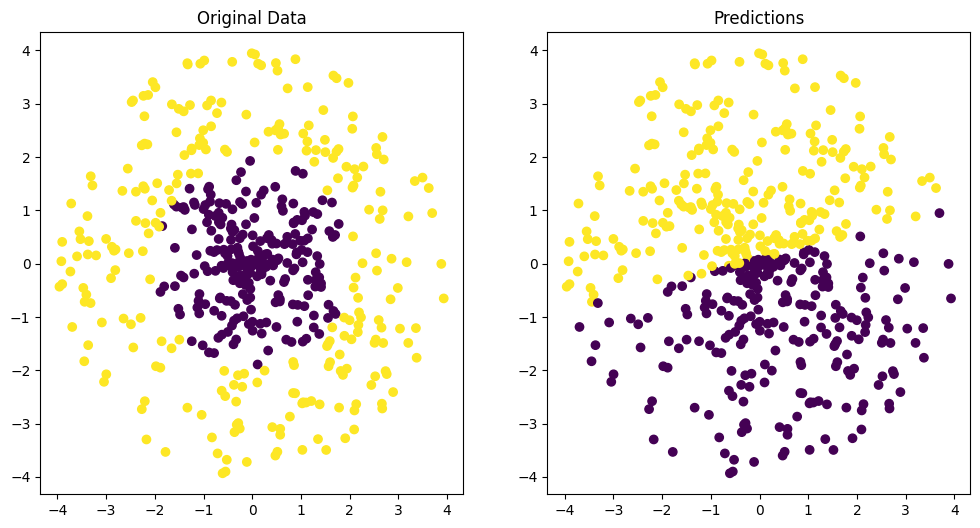

In [23]:
# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0], cmap='viridis')

plt.subplot(1, 2, 2)
plt.title("Predictions")
plt.scatter(x[:, 0], x[:, 1], c=y_pred[:, 0] > 0.5, cmap='viridis')  # 0.5를 기준으로 y값 판별
plt.show()


Activation 함수가 없는 경우에는 nn.Linear 함수는 선형함수로 선형함수만의 조합으로 비선형적인 모델을 만들지 못함

이제 ReLU 및 Sigmoid 추가하여 모델을 만들어 봄

In [24]:

# 데이터를 텐서로 변환
x_tensor = torch.Tensor(x)
y_tensor = torch.Tensor(y)

# 모델 정의
model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()  # 마지막에 Sigmoid 활성화 함수 추가하여 출력을 [0, 1] 범위로 조정
)

# 손실 함수와 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 학습
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

# 예측
with torch.no_grad():
    y_pred = model(x_tensor).numpy()

Epoch 0/1000, Loss: 0.7205501794815063
Epoch 100/1000, Loss: 0.5144492983818054
Epoch 200/1000, Loss: 0.5083895325660706
Epoch 300/1000, Loss: 0.5060731172561646
Epoch 400/1000, Loss: 0.5051122903823853
Epoch 500/1000, Loss: 0.5046178102493286
Epoch 600/1000, Loss: 0.5042842626571655
Epoch 700/1000, Loss: 0.5040467977523804
Epoch 800/1000, Loss: 0.5038665533065796
Epoch 900/1000, Loss: 0.5037331581115723


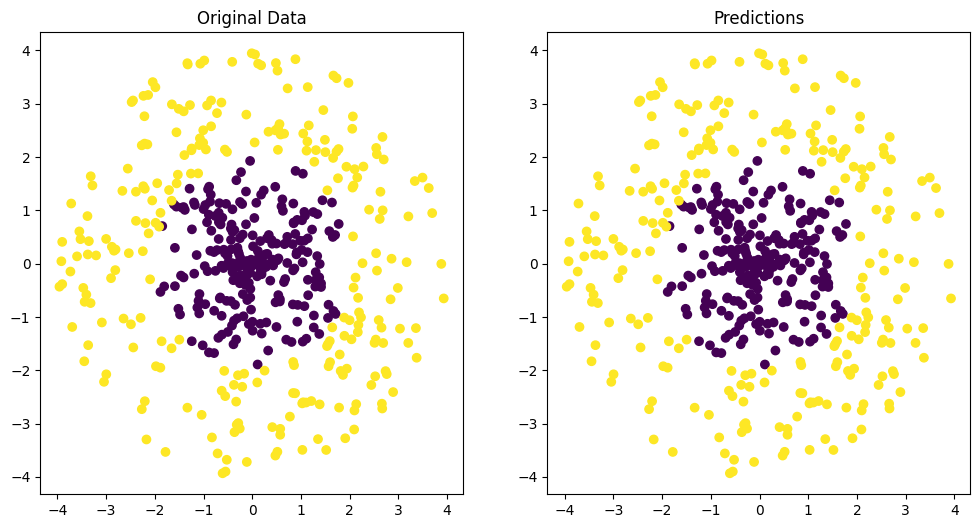

In [25]:
# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0], cmap='viridis')

plt.subplot(1, 2, 2)
plt.title("Predictions")
plt.scatter(x[:, 0], x[:, 1], c=y_pred[:, 0] > 0.5, cmap='viridis')
plt.show()

위 차트를 보면 원형의 모습을 제대로 모델이 예측할 수 있음